Exercise K-Nearest Neighbors

Veriyi kaggle'dan aldım: https://www.kaggle.com/datasets/barun2104/telecom-churn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('C:/DATA/data/exercises/telecom_churn.csv')

In [3]:
df.head(9)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7


Bir telekomünikasyon şirketinin müşteri kaybını (churn) anlamak veya öngörmek amacıyla toplanan verileri içerir. 
Bu tür bir veri seti genellikle müşteri bağlılığı ve memnuniyetini değerlendirmek, müşteri kaybını azaltmak veya müşteri kazanım stratejileri geliştirmek amacıyla kullanılır.

Churn: 1 if customer cancelled service, 0 if not (Müşteri hizmeti iptal ederse 1, iptal etmezse 0)
AccountWeeks: number of weeks customer has had active account(müşterinin aktif hesaba sahip olduğu hafta sayısı)
ContractRenewal: 1 if customer recently renewed contract, 0 if not (Müşteri sözleşmeyi yakın zamanda yenilemişse 1, değilse 0)
DataPlan: 1 if customer has data plan, 0 if not(Müşterinin veri planı varsa 1, yoksa 0)
DataUsage: gigabytes of monthly data usage(gigabaytlarca aylık veri kullanımı)
CustServCalls:number of calls into customer service(müşteri hizmetlerine yapılan çağrıların sayısı)
DayMins: average daytime minutes per month(ayda ortalama gündüz dakikası)
DayCalls: average number of daytime calls(gündüz aramalarının ortalama sayısı)
MonthlyCharge: average monthly bill(ortalama aylık fatura)
OverageFee : largest overage fee in last 12 months(son 12 aydaki en büyük aşım ücreti)

0 = customer continue service
1 = customer cancelled service

In [4]:
y = df['Churn'].values
np.unique(df['Churn'].values)
df['Churn'].value_counts() # 483 müşteri hizmeti iptal etmiş.

Churn
0    2850
1     483
Name: count, dtype: int64

In [5]:
df.isnull().sum() #Modelin doğruluğu için boş değer var mı yok mu kontrol ettik.

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


1- Normalize the data: StandardScaler
2- Classification: KNeighborsClassifier
3- Training
4- Evaluation: accuracy_score()

# Scikit-learn ile çalışabilmek için bağımlı değişken(Y) ve bağımsız değişkenlerimizi(X) ayrı ayrı numpy array tipine dönüştürmemiz gerekiyor.

In [7]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [8]:
X = df[['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']].values
X[0:5]

array([[  0.  , 128.  ,   1.  ,   1.  ,   2.7 ,   1.  , 265.1 , 110.  ,
         89.  ,   9.87,  10.  ],
       [  0.  , 107.  ,   1.  ,   1.  ,   3.7 ,   1.  , 161.6 , 123.  ,
         82.  ,   9.78,  13.7 ],
       [  0.  , 137.  ,   1.  ,   0.  ,   0.  ,   0.  , 243.4 , 114.  ,
         52.  ,   6.06,  12.2 ],
       [  0.  ,  84.  ,   0.  ,   0.  ,   0.  ,   2.  , 299.4 ,  71.  ,
         57.  ,   3.1 ,   6.6 ],
       [  0.  ,  75.  ,   0.  ,   0.  ,   0.  ,   3.  , 166.7 , 113.  ,
         41.  ,   7.42,  10.1 ]])

In [9]:
y = df['Churn'].values

In [10]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Modelin performansını arttırmak için verileri normalize ettik.

In [12]:
from sklearn import preprocessing
# Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [13]:
X[0:5]

array([[-0.41167182,  0.67648946,  0.32758048,  1.6170861 ,  1.48020373,
        -0.42793202,  1.56676695,  0.47664315,  1.99072703, -0.0715836 ,
        -0.08500823],
       [-0.41167182,  0.14906505,  0.32758048,  1.6170861 ,  2.26607248,
        -0.42793202, -0.33373776,  1.12450284,  1.56451025, -0.10708191,
         1.24048169],
       [-0.41167182,  0.9025285 ,  0.32758048, -0.61839626, -0.64164192,
        -1.1882185 ,  1.16830364,  0.67598459, -0.26213309, -1.57434567,
         0.70312091],
       [-0.41167182, -0.42859027, -3.05268496, -0.61839626, -0.64164192,
         0.33235445,  2.19659605, -1.46693591,  0.04230746, -2.74184587,
        -1.30302599],
       [-0.41167182, -0.6546293 , -3.05268496, -0.61839626, -0.64164192,
         1.09264093, -0.24008971,  0.62614923, -0.93190232, -1.03792666,
        -0.04918418]])

Train/Test Split

In [14]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

In [15]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2666, 11) (2666,)
Test set: (667, 11) (667,)


Bu çıktıda, eğitim setinde kaç örnek olduğu (Train set), test setinde kaç örnek olduğu (Test set), ayrıca bağımsız değişkenlerin ve bağımlı değişkenin boyutları yer almaktadır. 

Classification

In [16]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [17]:
neigh

KNeighborsClassifier(n_neighbors=2)

neigh adlı değişken, eğitilmiş k-NN sınıflandırıcı modelini temsil eder.  Modelineigh değişkenine atadık. Şimdi bu modeli kullanarak test setindeki verilere tahminlerde bulunabilir ve performansını değerlendirebiliriz.

Prediction

 y_hat vektörü, k-NN modeli tarafından X_test veri setindeki örnekler için yapılan sınıf tahminlerini içerir. Her bir değer, karşılık gelen örnek için tahmin edilen sınıfı temsil eder.

In [18]:
# Test seti üzerinde tahmin yapma
y_hat = neigh.predict(X_test)
y_hat[0:11]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Sınıflandırma modelinin yaptığı tahminler yanlış çıkarsa ki çıktı, bu durum da  modelin performansının değerlendirilmesi ve geliştirilmesi gerekir.
Accurate:   array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)
Prediction: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

Accuracy Evaulation

In [19]:
from sklearn import metrics
print("Train set accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, y_hat))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_hat)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_hat)
print("Classification Report:\n", class_report)

Train set accuracy: 1.0
Test set accuracy: 0.9985007496251874
Confusion Matrix:
 [[575   0]
 [  1  91]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       1.00      0.99      0.99        92

    accuracy                           1.00       667
   macro avg       1.00      0.99      1.00       667
weighted avg       1.00      1.00      1.00       667



modelin 667 test örneğinden 575'ini doğru bir şekilde sınıflandırdığını ve sadece 91 örneği yanlış bir şekilde sınıflandırdığını gösterir. Confusion matrix, sınıflandırma modelinin performansını daha ayrıntılı bir şekilde değerlendirmek için kullanılır ve farklı metrikleri (hassasiyet, duyarlılık, F1-score vb.) hesaplamak için temel oluşturur.

Confusion Matrix:
                    Prediction +    Prediction -
condition positive     [[575(TP)      0(FN)]
condition negative     [  1(FP)      91(TN)]]


Classification Reports: Sınıflandırma modelinin performansını değerlendirmek için kullanılır.
     - Precision(Hassasiyet):
            Bir sınıfın tahmin edildiği durumlar içinde gerçekten o sınıfa ait olanların oranını gösterir.
            Formülü: (TP)/(TP+FP)'tir.
     - Recall (Duyarlılık):
            Gerçekten o sınıfa ait olan gözlemlerin, modelin doğru bir şekilde tahmin ettiği gözlemlere oranını gösterir.
            Formülü: (TP)/(TP+FN)'tir.
     - F1-Score:F1-Score, 2*((Precision*Recall)/(Precision + Recall))
     - Support:
            Her sınıf için gerçek veri setinde kaç adet örnek olduğunu gösterir.
Sonuç: her iki sınıf için de yüksek precision, recall ve f1-score değerlerine sahip olduğunu gösteriyor. Bu durum, modelin test setinde başarılı bir şekilde sınıflandırma yaptığını gösterir. 

Jaccard Indexi:
Sınıflandırma modellerinde Jaccard İndeksi, modelin tahminleri ile gerçek değerleri arasındaki benzerliği ölçmek için kullanılabilir. Özellikle çok sınıflı sınıflandırma problemlerinde, farklı sınıfların tahminleri arasındaki benzerlik analizi için Jaccard İndeksi kullanılabilir.
Jaccard_Index(A,B)= ∣A∩B∣/A∪B∣
Jaccard İndeksi değeri 0 ile 1 arasında değişir. modelin tahminleri ile gerçek değerleri tamamen eşitse (ortak eleman sayısı birleşim kümesinin eleman sayısına eşitse), Jaccard İndeksi 1 olur. İki küme arasında hiç ortak eleman yoksa, Jaccard İndeksi 0 olur.


Logaritmik kayıp değeri ne kadar küçükse, modelin tahminleri gerçek sınıflarla o kadar uyumlu demektir. Yüksek logaritmik kayıp değerleri, modelin tahminlerinin gerçek sınıflardan sapmış olduğunu gösterir.

Logaritmik kayıp, genellikle ikili sınıflandırma problemlerinde ve çok sınıflı sınıflandırma problemlerinde kullanılır. Sci-kit-learn ve diğer birçok makine öğrenimi kütüphanesi, logaritmik kayıp hesaplamak için fonksiyonlar sağlar.


# Optimum sonucu bulmak için k değerlerini değiştirebiliriz

In [20]:
from sklearn.metrics import accuracy_score

# Farklı k sayıları için modelin performansını değerlendirme
for k in range(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"n_neighbors = {k}, Test set accuracy: {accuracy}")

n_neighbors = 1, Test set accuracy: 1.0
n_neighbors = 2, Test set accuracy: 0.9985007496251874
n_neighbors = 3, Test set accuracy: 1.0
n_neighbors = 4, Test set accuracy: 0.9955022488755623
n_neighbors = 5, Test set accuracy: 1.0
n_neighbors = 6, Test set accuracy: 0.9985007496251874
n_neighbors = 7, Test set accuracy: 1.0
n_neighbors = 8, Test set accuracy: 1.0
n_neighbors = 9, Test set accuracy: 1.0
n_neighbors = 10, Test set accuracy: 0.9985007496251874


In [21]:
from sklearn import metrics
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    # train and prediction for each k
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [22]:
mean_acc

array([1.        , 0.99850075, 1.        , 0.99550225, 1.        ,
       0.99850075, 1.        , 1.        , 1.        ])

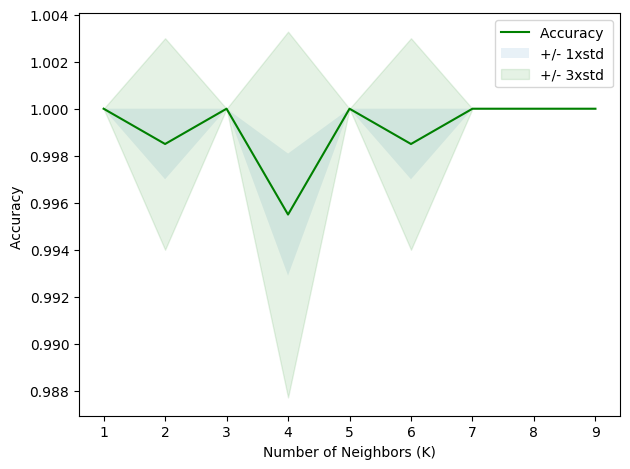

In [23]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [24]:
print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy 1.0 with k= 1
